<a href="https://colab.research.google.com/github/fursew05/DOE/blob/main/%EC%8B%A4%ED%97%98%EA%B3%84%ED%9A%8D%EB%B2%95_7%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 부분요인배치 (Fractional Factorial Design)
- 요인배치는 요인 수가 많아질수록 실험수는 빠르게 증가함
- 고차원의 교호작용을 무시할 수 있다면, 저차원의 교호작용과 main effect를 구할 수 있는 일부 실험만 진행하면 실험 수를 줄일 수 있음
- 다음의 3가지를 통해 FFD를 성공적으로 사용할 수 있음


1.   Sparsity of effects : 고차원 교호작용 factor를 제거
2.   Projection property : FD보다 더 적은 요인으로 설계
3.   Sequential experiment : 해석이 어려울 수 있기 때문에 각 fractional마다 실험수를 추가


## One-Half FFD
- $2^k$ Factorial Design이 있다면 One-Half FFD는 $2^{k-1}$ FFD가 된다
- 2^3 FD라면 8개의 요인조합에 대해서 실험을 진행하지만 2^2 FFD는 4개의 요인조합에 대해서만 진행하게 된다
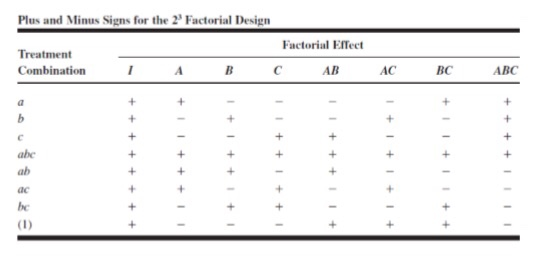

- 표와 같이 가장 고차원인 abc에 대해서 같은 '+' 부호인 a,b,c,abc를 제외하고 (1),ab,ac,bc에 대해서만 진행하게 된다
- 완전요인배치에 비하여 실험 수를 줄일 수 있는 장점이 있으나 특정 main effec와 interaction effect는 값이 합쳐져 있어 개별 효과를 알 수 없는 교락 상태가 발생한다는 단점이 있음
- 예를 들어 위의 표와 같이 + 표시가 되어있는 a,b,c,abc에 대해서 실험을 수행한다면 a의 effect는 $\frac{abc+a-b-c}{2}$이다. 그런데 bc의 effect도
계산헤보면 $\frac{abc+a-b-c}{2}$로 a와 동일한데 a와 bc의 effect가 합쳐져 분리할 수 없음을 의미한다.
- 즉, A의 effect를 추정하는 것이 아닌 A + BC의 effect를 추정하게 되는 것이다

### 기본 설계 방법
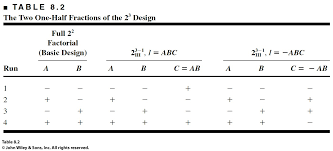-

- 위의 예제를 설명해보면, $2^3$ FD를 완전히 수행할 수 없을때 one half fractional ffd는 $2^2$ FD를 진행하면서 동시에 C 요인을 A,B의 interaction effect factor로 정의한다
- 총 2개의 Fraction을 구성해야 함


1.   principal fraction : I = ABC로 정의되어 C = AB가 된다
2.   complementary fraction : I = -ABC로 정의되어 C = -AB가 된다



In [17]:
# 예제
import pandas as pd

df = pd.DataFrame(
    {"A" : ["-","+","-","+","-","+","-","+"],
     "B" : ["-","-","+","+","-","-","+","+"],
     'C' : ["-","-","-","-","+","+","+","+",],
     'D' : ["-","+","+","-","+","-","-","+"],
     'treatment_comb' : ["(1)","ad","bd","ab","cd","ac","bc","abcd"],
     'filteration_rate' : [45,100,45,65,75,60,80,96]}
)

for col in ['A','B','C','D']:
  df[col] = df[col].map(lambda x : -1 if x == '-' else 1)

df.index = df['treatment_comb']
df.drop(columns=['treatment_comb'],inplace=True)
df

,A,B,C,D,filteration_rate
treatment_comb,,,,,
(1),-1,-1,-1,-1,45
ad,1,-1,-1,1,100
bd,-1,1,-1,1,45
ab,1,1,-1,-1,65
cd,-1,-1,1,1,75
ac,1,-1,1,-1,60
bc,-1,1,1,-1,80
abcd,1,1,1,1,96


In [18]:
import pandas as pd
import numpy as np
from patsy import dmatrix
import statsmodels.api as sm
from statsmodels.formula.api import ols
from itertools import product

# # --- 효과(Effect) 계산 ---

# 1. 대비(Contrast)를 계산하기 위한 설계 행렬 생성
# R: cont <- model.matrix( ~ -1 + A * B * C * D, data=dat8_1)
# D는 A:B:C와 별명(alias) 관계
formula_cont = "~ -1 + A * B * C * D"
cont = dmatrix(formula_cont, data=df, return_type='dataframe')
cont

,A,B,A:B,C,A:C,B:C,A:B:C,D,A:D,B:D,A:B:D,C:D,A:C:D,B:C:D,A:B:C:D
treatment_comb,,,,,,,,,,,,,,,
(1),-1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0
ad,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0
bd,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0
ab,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0
cd,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0
ac,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,1.0
bc,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0
abcd,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


- B의 effect가 상대적으로 약한 것을 확인할 수 있음
- B를 제거,

In [19]:
cont = cont[['A','B','C','D','A:B','A:C','B:C']]
cont

,A,B,C,D,A:B,A:C,B:C
treatment_comb,,,,,,,
(1),-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0
ad,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0
bd,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0
ab,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0
cd,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0
ac,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0
bc,-1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0
abcd,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [21]:
# 2. 효과 벡터 계산
# R: eff_vec <- (dat8_1$y %*% cont[,1:7]) / 4
y_vec = df['filteration_rate'].values
eff_vec = (y_vec @ cont) / 4

print("### 계산된 전체 요인 효과 ###")
print(eff_vec)

### 계산된 전체 요인 효과 ###
A      19.0
B       1.5
C      14.0
D      16.5
A:B    -1.0
A:C   -18.5
B:C    19.0
dtype: float64


- 추정된 effect를 봤을때 값이 작은(절댓값) B와 A:B의 효과를 무시하고 나머지 effect들을 활용하여 anova 진행을 하면 됨

- B를 무시하게 되면서 $2^4$ FFD 에서 $2^3$ FFD로 변경

In [29]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
df.rename(columns={"C":"_C"},inplace=True)
model = ols("filteration_rate ~ A + _C + D + A:_C + A:D",data=df).fit()
anova_table = anova_lm(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
A,1.0,722.0,722.00,222.153846,0.004471
_C,1.0,392.0,392.00,120.615385,0.008189
D,1.0,544.5,544.50,167.538462,0.005916
A:_C,1.0,684.5,684.50,210.615385,0.004714
A:D,1.0,722.0,722.00,222.153846,0.004471
Residual,2.0,6.5,3.25,NaN,NaN


## One - Quarter Fraction

기존 FFD 실험 횟수에서 1/4의 실험만 진행하는 방식으로
2개 요인에 대해서 선택한 상호 작용과 연관시킨다

예시 - 요인이 총 6개일때 ABCDEF이면 E = ABC로 F= BCD의 상호작용으로 연관시킨다. 이 때는 main effect 값을 먼저 관찰하고 상대적으로 낮은 effect들에 대해서 상호작용과 연관시킨다.

예시처럼 진행하면 $I = ABCE$이고 $I = BCDF$가 된다

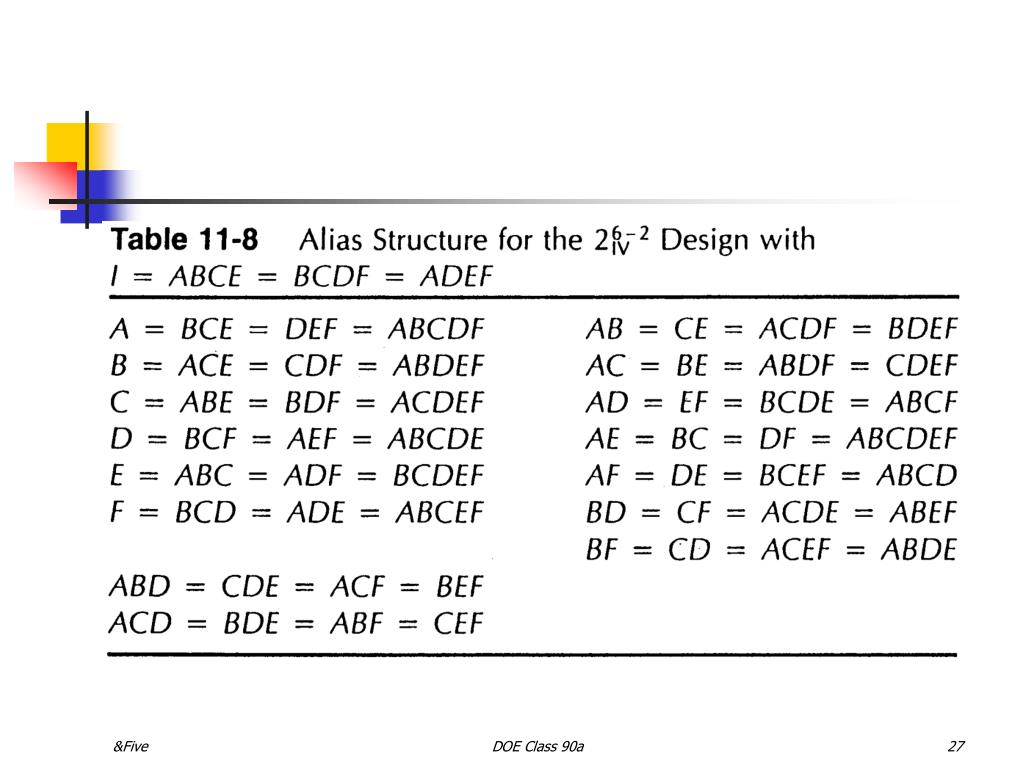

In [31]:
df = pd.DataFrame({
    "A" : [-1,1,-1,1,-1,1,-1,1,-1,1,-1,1,-1,1,-1,1],
    'B' : [-1,-1,1,1,-1,-1,1,1,-1,-1,1,1,-1,-1,1,1],
    'C' : [-1,-1,-1,-1,1,1,1,1,-1,-1,-1,-1,1,1,1,1],
    'D' : [-1,-1,-1,-1,-1,-1,-1,-1,1,1,1,1,1,1,1,1],
    'E' : [-1,1,1,-1,1,-1,-1,1,-1,1,1,-1,1,-1,-1,1],
    'F' : [-1,-1,1,1,1,1,-1,-1,1,1,-1,-1,-1,-1,1,1],
    'value' : [6,10,32,60,4,15,26,60,8,12,34,60,16,5,37,52]
},index=['(1)','ae','bef','abf','cef','acf','bc','abce','df','adef','bde','abd','cde','acd','bcdf','abcdef'])
df

,A,B,C,D,E,F,value
(1),-1,-1,-1,-1,-1,-1,6
ae,1,-1,-1,-1,1,-1,10
bef,-1,1,-1,-1,1,1,32
abf,1,1,-1,-1,-1,1,60
cef,-1,-1,1,-1,1,1,4
acf,1,-1,1,-1,-1,1,15
bc,-1,1,1,-1,-1,-1,26
abce,1,1,1,-1,1,-1,60
df,-1,-1,-1,1,-1,1,8
adef,1,-1,-1,1,1,1,12
